In [1]:
import iss
import numpy as np
from matplotlib import pyplot as plt

### Iterated sums of a circle

In [2]:
rn = np.linspace(0, 2*np.pi, 200)

x1 = np.c_[np.cos(rn-np.pi), np.sin(rn)]

rn = np.linspace(-1, 1, 100)

x2 = np.c_[
    np.r_[rn, rn[-2::-1]],
    np.r_[np.sqrt(1-rn**2), -np.sqrt(1-rn[-2::-1]**2)],
]

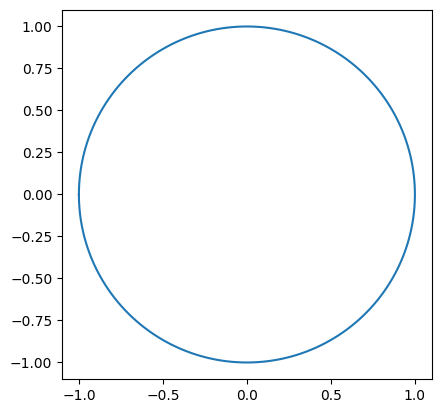

In [3]:
plt.plot(x1[:, 0], x1[:, 1])
plt.gca().set_aspect("equal")

In [4]:
words = []
words.append(iss.words.of_weight(1, 2))
words.append(iss.words.of_weight(2, 2))
words.append(iss.words.of_weight(3, 2))
words.append(iss.words.of_weight(4, 2))

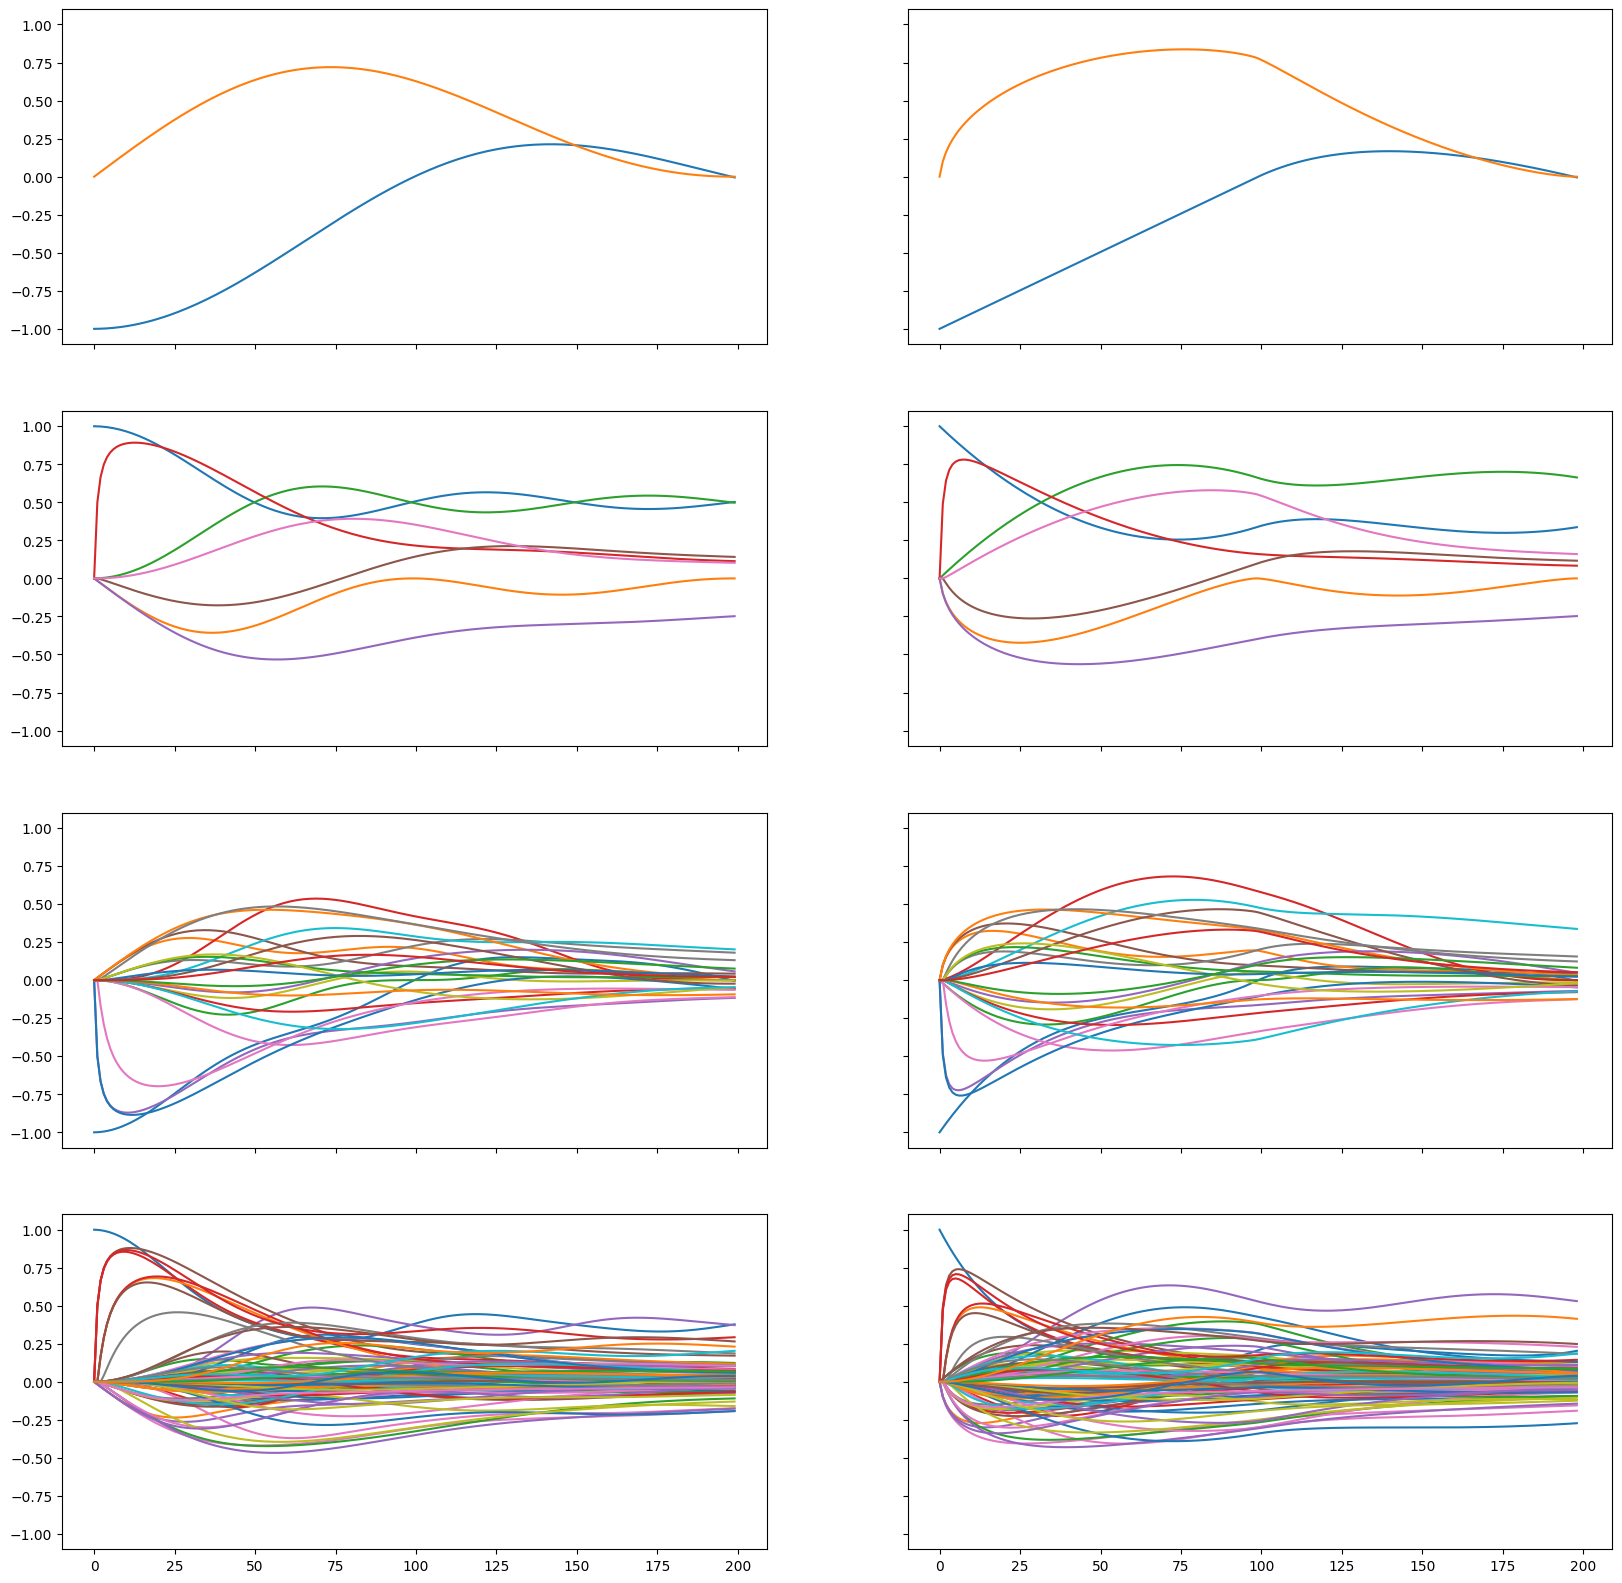

In [10]:
fig, ax = plt.subplots(len(words), 2, figsize=(20, 20),
                       sharey=True, sharex=True)

for i in range(len(words)):
    for word in words[i]:
        ax[i, 0].plot(iss.iss(x1, word, normalize=True), label=f"${word}$")
        ax[i, 1].plot(iss.iss(x2, word, normalize=True), label=f"${word}$")
    # ax[i].legend(loc="upper left")